[Blog you can follow---->>>](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)

## There are four types of recommender systems:-

**1. Demographic Filtering**<br>
**2. Content Based Filtering**<br>
**3. Collaborative Filtering**<br>
          
> a. User to user filtering

> b. Item to item filtering

**4. Latent Factor base**

<br><br><br>
      
      
      
* `1. Demographic Filtering-`
     The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience, based on movie popularity and/or genre.

* `2. Content Based Filtering-` 
      They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that `if a person liked a particular item, he or she will also like an item that is similar to it.`
      
* `3. Collaborative Filtering-`


* `4. Latent Factor base-`
      
  

## Demographic Filtering

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [35]:
df1 = pd.read_csv('dataset/tmdb_5000_credits.csv')
df2 = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [12]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [13]:
df1.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [14]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [15]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


#### The first dataset contains the following features:-
* movie_id - A unique identifier for each movie.
* title    - movie title
* cast     - movie actors
* crew     - The name of Director, Editor, Composer, Writer etc.

#### The second dataset hast the following features:-
* budget  - The budget in which the movie has made.
* genres  - The genre of movies like Action, Comedy, Thriller etc.
* homepage- A link to the homepage of the movie.
* id      - This is the movie_id as in the first dataset.
* keywords-  The keywords or tags related to the movie.
* original_language - Movie language in which the movie is made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue  - The revenue generated by the movie in the world.
* runtime - The running time of movie in minute.
* spoken_languages - Movie spoken language.
* status - Released or Rumored.
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count -  the count of votes received.


In [7]:
df2.shape

(4803, 20)

In [8]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [16]:
df1.columns = ['id', 'title', 'cast', 'crew']

In [17]:
df2 = df2.merge(df1, on='id')

In [18]:
# remove title_y because title_x is same as title_y
df2 = df2[['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'cast', 'crew']]

In [19]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
type(df2.loc[0,'cast'])

str

## Demographic Filtering -

Before getting started with this -

* we need a metric to score or rate movie
* Calculate the score for every movie
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

![link](https://image.ibb.co/jYWZp9/wr.png)
where,

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(`vote_count`) and R(`vote_average`) and C can be calculated as

In [20]:
C = df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for `m`, the minimum votes required to be listed in the chart. We will use `90th` percentile as our cutoff. In other words, for a movie to feature in the charts, `it must have more votes than at least 90% of the movies in the list.`

In [21]:
# https://stackoverflow.com/questions/56244887/how-does-pandas-quantile-function-works-internally/64290225#64290225
m = df2['vote_count'].quantile(q=0.9)
m

1838.4000000000015

Now, we can `filter out` the movies that qualify for the chart

In [22]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [17]:
q_movies.shape

(481, 22)

In [23]:
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m))*R + (m/(m+v))*C

In [24]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies['score']

0       7.050669
1       6.665696
2       6.239396
3       7.346721
4       6.096368
          ...   
4291    6.693677
4300    7.366378
4302    7.210428
4337    7.198026
4602    7.210563
Name: score, Length: 481, dtype: float64

In [25]:
q_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


In [21]:
q_movies = q_movies.sort_values('score', ascending=False)

Show top 10 movies

In [26]:
q_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
0,Avatar,11800,7.2,7.050669
1,Pirates of the Caribbean: At World's End,4500,6.9,6.665696
2,Spectre,4466,6.3,6.239396
3,The Dark Knight Rises,9106,7.6,7.346721
4,John Carter,2124,6.1,6.096368
5,Spider-Man 3,3576,5.9,5.965250
6,Tangled,3330,7.4,6.934805
7,Avengers: Age of Ultron,6767,7.3,7.041968
8,Harry Potter and the Half-Blood Prince,5293,7.4,7.062856
9,Batman v Superman: Dawn of Justice,7004,5.7,5.781535


In [27]:
pop = df2.copy().loc[df2['vote_count'] >= m]
pop = pop.sort_values('popularity', ascending=False)
pop.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."


##### Draw barh graph using popularity and title

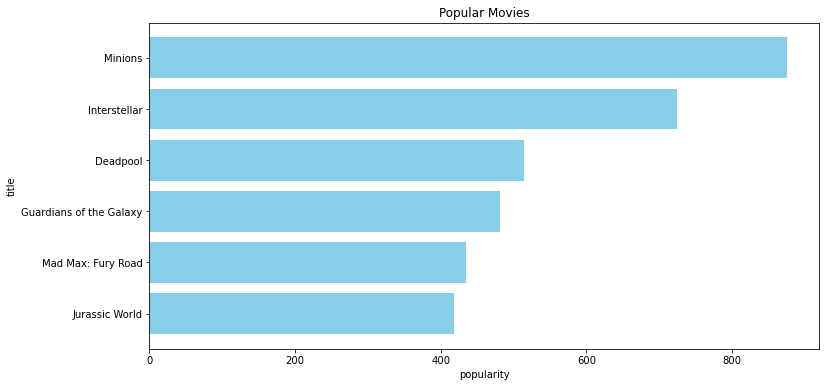

In [28]:
plt.figure(figsize=(12,6))

plt.barh(pop['title_x'].head(6), pop['popularity'].head(6),align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('popularity')
plt.ylabel('title')
plt.title('Popular Movies')
plt.show()

Now something to keep in mind is that these demographic recommender provide a `general chart of recommended movies` to all the users. `They are not sensitive to the interests and tastes of a particular user`. This is when we move on to a more refined system- Content Basesd Filtering.


### Content Based Filtering
In this recomendation system, the content of the movie(`keywords, overview, tagline, cast, crew` etc.) is used to find similarities with other movies. Then the movies that are most likely to be similar recomended.


<img src="https://image.ibb.co/f6mDXU/conten.png" width=400 height=450> </img>

In [29]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [26]:

# text processing - 1.....................................my practice..............................
"""
from sklearn.feature_extraction import text
#print(text.ENGLISH_STOP_WORDS)
my_words = set(['my_stop_word_1','my_stop_word_2'])
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_words)
vectorizer = text.TfidfVectorizer(stop_words=set(my_stop_words))
X = vectorizer.fit_transform(["Hi, this is a test string my_stop_word_2 Hi my_stop_word"])
vectorizer.get_feature_names()
"""


# text processing  - 2
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue dark gray light.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
"""
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)
"""

#count_wm.toarray()
"""
array([[0.70710678, 0.        , 0.70710678, 0.        ],
       [0.        , 0.70710678, 0.        , 0.70710678]])
array([[1., 0.],
       [0., 1.]])
       
array([[1,  0., 1, 0.],
       [0., 1,  0., 1]])
array([[2., 0.],
       [0., 2.]])

array([[1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1]]
array([[3., 0.],
       [0., 2.]])

"""


# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#Compute the cosine similarity matrix
cosine_s = linear_kernel(tfidf_wm, tfidf_wm)
cosine_s


#print(tfidf_wm.toarray())

array([[1., 0.],
       [0., 1.]])

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute `Term Frequency-Inverse Document Frequency (TF-IDF) vectors` for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as `(term instances/total instances)`. `Inverse Document Frequency` is the relative count of documents containing the term is given as `log(number of documents/documents with term)` The `overall importance` of `each word` to the documents in which they appear is equal to `TF * IDF`

This will give you a `matrix` where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop
# words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transfering
#the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [28]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

`With this matrix in hand`, we can now compute a ```similarity score```. There are several candidates for this; such as the `euclidean`, the `Pearson` and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). `There is no right answer` to `which score is the best`. `Different scores work well` in `different scenarios` and it is often a `good idea` to `experiment with different metrics.`

We will be using the `cosine similarity` to calculate a `numeric quantity` that `denotes` the `similarity between two movies`. We use the cosine similarity score since it is `independent of magnitude` and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
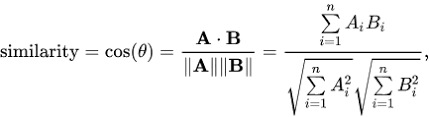

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's `linear_kernel()` instead of `cosine_similarities()` since it is `faster`.

In [31]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(4803, 4803)

In [32]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

We are going to define a function that takes in a `movie title as an input` and `outputs `a list of the 10 most similar movies. 

Firstly,  for this, we need a reverse mapping of movie titles and DataFrame indices. 
`In other words`, we need a mechanism to identify the index of  a movie in our metadata DataFrame, given its title.

In [33]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title_x']).drop_duplicates()
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [34]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title_x'].iloc[movie_indices]

In [33]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [34]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, `the quality of recommendations is not that great`. "The Dark Knight Rises" `returns all Batman movies` while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that `cannot be captured by the present system`.

In [35]:
#df2 = df2.head(2)

### Credits, Genres and Keywords Based Recommender
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: `the 3 top actors`, `the director`, `related genres` and `the movie plot keywords`.

From the `cast`, `crew` and `keywords features`, we need to `extract` the three most important `actors`, `the director` and the `keywords` associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a `safe and usable structure`.
#### String to list conversion

In [36]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

# string format data is converted to list
# type(df.loc[0, 'cast'])
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [37]:
df2[['cast', 'crew', 'keywords', 'genres']].head(3)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [38]:
df2.loc[0, 'crew'][0]['credit_id']

'52fe48009251416c750aca23'

In [39]:
df2.loc[0, 'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [40]:
df2.loc[0, 'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [41]:
df2.loc[0, 'genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [42]:
df2.loc[0, 'keywords']

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [43]:
print(df2.loc[0, 'crew'][1]['job'])
print(df2.loc[0, 'crew'][2]['job'])
print(df2.loc[0, 'crew'][3]['job'])

Production Design
Sound Designer
Supervising Sound Editor


In [44]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for row in x:
        if row['job'] == 'Director' or row['job'] == 'director':
            return row['name']
    return np.nan

In [45]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        #print(x,'\n\n\n')
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [46]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)
#df2['cast'] = df2['cast'].apply(get_list)


In [47]:
# Print the new features of the first 3 films
df2[['title_x', 'cast', 'director', 'keywords', 'genres']].head(3)
#df2[['title_x', 'cast']].head(3)

,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [48]:
type(df2.loc[0,'director'])

str

The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our `vectorizer doesn't count` the Johnny of `"Johnny Depp"` and `"Johnny Galecki"` as the same.

In [49]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(val.replace(" ", "")) for val in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [50]:
features = ['director','cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [51]:
df2[['director','cast', 'keywords', 'genres']].head(3)

,director,cast,keywords,genres
0,jamescameron,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,goreverbinski,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,sammendes,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]","[action, adventure, crime]"


We are now in a position to create our `"metadata soup"`, which is a `string` that contains `all the metadata` that we want to feed to our `vectorizer` `(namely actors, director and keywords).`

In [52]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [53]:
df2['soup'].head(3)

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
Name: soup, dtype: object

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the `CountVectorizer()` instead of `TF-IDF`. This is because `we do not want to down-weight the presence of an actor/director` if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [54]:
# import CounterVectorizeer to create count_matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [55]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [56]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title_x'])

We can now reuse our `get_recommendations()` function by passing in the new `cosine_sim2 matrix` as your second argument.

In [57]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object

In [58]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_x, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . `We can also increase the weight of the director` , by adding the feature multiple times in the soup.

### Collaborative Filtering

[Lecture-1-----------Stanford University](https://www.youtube.com/watch?v=h9gpufJFF-0)

The engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-
<ol>
    <li> <b>User to user Filtering</b></li>
    <li> <b>Item to item Filtering</b></li>
</ol>


<img src="similarity_measure/_1.png" width=400 height=450>

<img src="similarity_measure/_2.png" width=400 height=450>

<img src="similarity_measure/_3.png" width=400 height=450>

<img src="similarity_measure/_4.png" width=400 height=450>

<img src="similarity_measure/_5.png" width=400 height=450>

<img src="similarity_measure/_6.png" width=400 height=450>

<img src="similarity_measure/_7.png" width=400 height=450>

<img src="similarity_measure/_8.png" width=400 height=450>

<img src="similarity_measure/_9.png" width=400 height=450>

<img src="similarity_measure/_10.png" width=400 height=450>

<img src="similarity_measure/_11.png" width=400 height=450>

<img src="similarity_measure/_12.png" width=400 height=450>

<img src="similarity_measure/_13.png" width=400 height=450>


this is the case and the answer turns out to be quite interesting items are inherently simpler than users 
items belong to for example a small set of genres for example you know you can take a piece of music and 
then classify the classical music or pop or rock and so on whereas users tend to have very very varied tastes 
so the same user might like for example baroque classical music and an acid rock and these two are very different
genres but the same user might actually like both these genres but it very rare that an item would actually 
belong to both these genres of music and therefore it turns out that `the notion of item similarity is inherently` 
`more meaningful than the notion of user similarity` and that's why item item collaborative filtering works much 
better than user user collaborative filtering for most use cases.


It successfully avoids the problem posed by `dynamic user preference as item-based CF is more static`. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. `The worst case complexity is O(mn)` with m users and n items. In addition, sparsity is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. `In extreme cases,` we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is `scalability`. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, `sparsity` is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

## Single Value Decomposition
One way to handle the scalability and sparsity issue created by CF is to leverage a [latent factor model](https://www.youtube.com/watch?v=E8aMcwmqsTg&t=49s) to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user.

One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.
Now talking about latent factor you might be wondering what is it ?It is a broad idea which `describes a property
or concept that a user or an item have`. For instance, for music, latent factor can refer to the genre that the
music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially,
we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand
the relationship between users and items as they become directly comparable. The below figure illustrates this
idea.


<img src="svd/1.png">
<img src="svd/2.png">
<img src="svd/3.png">
<img src="svd/4.png">
<img src="svd/5.png">
<img src="svd/6.png">
<img src="svd/7.png">


let's say three-dimensional representation of a given user or of a given movie right. So what is really means is
that we took this big utility matrix R and now we took all the movies and all the users and map them into this in
as I showed in the previous slide in this kind of three dimensional space and this is why in this axis of 
this `latent subspace` are `called factors`. This kind of the idea is that now movies and also users get mapped into this into this space where basically this `axis` that we find here are the `axis of variation` right so maybe
just `hypothetically` imagine that what our `factorization` would discover is that we have our space has two main `axis of variation` there are movies that are `geared towards females` and there are kind of the guys movies and then there are you know the serious movies and then there are funny movies right. `Now every user is a data point somewhere in this space and also every movie is a data point in this space`. Some users movies are closer together than some other pairs of movies and users right so that's kind of what `latent factory recommander system` is
doing in some sense it's finding this `low dimensional representation of users and movies` such that kind of people that like those movies are close together with each other.

Now enough said , let's see how to implement this. Since the dataset we used before `did not` have `userId(which is necessary for collaborative filtering)` let's load another dataset. We'll be using the [Surprise](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [2]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

#load_from_folds()

In [4]:
svd = SVD()
rmse = cross_validate(svd, data, measures=['RMSE', 'MAE'])

In [5]:
rmse['test_rmse'].mean()

0.896146730672152

We get a mean Root `Mean Sqaure Error of 0.89` approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [6]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user id 1 and check the ratings she/he given.


In [7]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [8]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.9206282401210215, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.920. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

### Conclusion
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, `Hybrid Systems` can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.